# Import Library

In [174]:
import pandas as pd
import numpy as np
#untuk missing value
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import missingno as msno
#untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Informasi Data

Berhubung tidak ada informasi dari setiap variabel, maka diasumsikan variabel adalah sebagai berikut:


1. Gender : Jenis kelamin
2. Usia : Usia responden
3. Kota : Tempat responden berada
4. Profesi : Pekerjaan responden
5. s1 : Mengetahui apa itu big data
6. s2 : Mengetahui fungsi big data
7. s3 : Mengetahui manfaat big data
8. k1 : Pekerjaan yang menangani big data
9. k2 : Gaji responden saat ini
10. k3 : Jurusan kuliah yang biasanya bekerja mengolah big data
11. k4 : Jurusan kuliah yang paling sesuai dalam mengolah big data
12. k5 : Skill yang dibutuhkan untuk mengolah big data
13. k6 : Apakah big data sangat penting di era modern?
14. k7 : Apakah big data berguna bagi dunia bisnis?
15. k8 : Apakah big data penting dalam pengambilan keputusan? 
16. k9 : Apakah big data penting bagi sektor publik?
17. k10 : Sektor yang memiliki big data
18. k11 : Gaji yang diterima untuk posisi mengolah big data
19. k12 : Berapa tahun yang dibutuhkan untuk mempelajari big data dan data science
20. k13 : Seberapa baik penerapan data science di sektor pekerjaan responden
21. k14 : Ketertarikan responden dalam big data
22. k15 : kapan sektor pekerjaan responden bisa sepenuhnya menerapkan data science

# Tujuan
1. Melakukan data cleaning 
2. Melakukan eksploratory data analysis guna memberikan gambaran tentang informasi data
3. Mengklasifikasikan pendapat responden mengenai big data

# Load dataset

In [42]:
#memasukkan data ke dalam pyhton
df=pd.read_spss('Dataset Survey Data Science.sav')
pd.set_option('display.max_columns', None)
df.head(5)

,id_responden,gender,usia,kota,profesi,s1,s2,s3,k1_1,k1_2,k1_3,k1_4,k1_5,k1_6,k2,k3_1,k3_2,k3_3,k3_4,k3_5,k3_6,k3_7,k4,k5,k6,k7,k8,k9,k10_1,k10_2,k10_3,k11,k12,k13,k14,k15
0,dtIHeEdIWi,Perempuan,27.0,Malang,TNI,Ya,Tidak,Ya,Data Analyst,Data Scientist,Data Engineer,NaN,Business Analyst,NaN,5000000.0,Ilmu komputer,Bisnis dan manajemen,Matematika,NaN,Sastra bahasa,NaN,NaN,Ilmu komputer,Rasa penasaran yang tinggi,Tidak penging,Penting,Tidak penging,Penting,Lembaga Pendidikan,Industri/ Swasta,Industri/ Swasta,9000000.0,1.0,Sudah baik dalam penerapan Data science,Ya,2025.0
1,SnoTELFrJq,Laki-laki,31.0,Banda Aceh,PNS,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iekjmjGUYD,Perempuan,25.0,Surabaya,TNI,Ya,Ya,Ya,Data Analyst,NaN,Data Engineer,NaN,Business Analyst,NaN,4500000.0,Ilmu komputer,NaN,Matematika,Fisika,NaN,Statistika,NaN,Fisika,"Pemrograman (Python, R, Scala, Java, SQL)",Biasa saja,Penting,Sangat tidak penting,Sangat tidak penting,Pemerintah,Lembaga Pendidikan,Lembaga Pendidikan,7000000.0,1.0,Dalam proses merespon perkembangan Data science,Ya,2040.0
3,nfwbLbxeYz,Perempuan,26.0,Medan,TNI,Ya,Tidak,Tidak,NaN,Data Scientist,NaN,Machine Learning Engineer,Business Analyst,NaN,4500000.0,Ilmu komputer,Bisnis dan manajemen,Matematika,Fisika,NaN,NaN,NaN,Matematika,"Software statistik (SPSS, Matlab, SAS)",Sangat tidak penting,Sangat penting,Biasa saja,Penting,Lembaga Pendidikan,Industri/ Swasta,Lembaga Pendidikan,9000000.0,7.0,Dalam proses merespon perkembangan Data science,Ya,2035.0
4,kigBOPrxNU,Laki-laki,28.0,Samarinda,Polisi,Ya,Ya,Tidak,Data Analyst,NaN,Data Engineer,NaN,Business Analyst,NaN,6000000.0,Ilmu komputer,Bisnis dan manajemen,NaN,NaN,Sastra bahasa,NaN,NaN,Bisnis dan manajemen,"Business Intelligence (Power BI, Tableau)",Sangat tidak penting,Penting,Biasa saja,Biasa saja,Pemerintah,Pemerintah,Industri/ Swasta,5000000.0,6.0,Belum ada tindak lanjut,Ya,2025.0


# Preprocessing

## Memeriksa Missing Value

In [43]:
#memeriksa informasi data
def info_data(df) :
    pd.set_option('display.max_rows',None)
    missing_values = df.isnull().sum()
    missing_perc = (missing_values/len(df))*100
    data_type = df.dtypes
    num_unique = df.nunique()
    
    print (f'Number of Rows,Columns {df.shape}')
    print (f'Number of Duplicated Values {df.duplicated().sum()}')
    
    return pd.DataFrame ({'Missing_value' : missing_values,
                          'Percent_missing_%' : missing_perc,
                          'Data_type' : data_type,
                          'Number of Unique' : num_unique}).sort_values('Percent_missing_%',ascending=False)
info_data(df)
    

Number of Rows,Columns (2000, 36)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
k1_6,1996,99.80,category,1
k3_7,1992,99.60,category,1
k3_4,1014,50.70,category,1
k3_2,1006,50.30,category,1
k3_3,1005,50.25,category,1
k3_1,1001,50.05,category,1
k3_6,988,49.40,category,1
k3_5,972,48.60,category,1
k1_1,844,42.20,category,1
k1_2,828,41.40,category,1


In [6]:
#memeriksa unique value
for x in df.columns : 
    print (f'===== {x} =====')
    print (f'{df[x].unique()}')
    print()

===== id_responden =====
['dtIHeEdIWi' 'SnoTELFrJq' 'iekjmjGUYD' ... 'qbSXZQzRpe' 'uBzzLLFxkp'
 'FKRGqovFdB']

===== gender =====
['Perempuan', 'Laki-laki']
Categories (2, object): ['Laki-laki', 'Perempuan']

===== usia =====
[27. 31. 25. 26. 28. 30. 36. 34. 37. 33. 29. 32. 40. 35. 39. 38.]

===== kota =====
['Malang', 'Banda Aceh', 'Surabaya', 'Medan', 'Samarinda', ..., 'Tangerang', 'Jakarta', 'Cilacap', 'Palu', 'Depok']
Length: 19
Categories (19, object): ['Banda Aceh', 'Bandung', 'Bekasi', 'Bogor', ..., 'Surabaya', 'Tangerang',
                          'Tasikmalaya', 'Yogyakarta']

===== profesi =====
['TNI', 'PNS', 'Polisi', 'Pegawai swasta', 'Guru/ Dosen']
Categories (5, object): ['Guru/ Dosen', 'PNS', 'Pegawai swasta', 'Polisi', 'TNI']

===== s1 =====
['Ya', 'Tidak']
Categories (2, object): ['Tidak', 'Ya']

===== s2 =====
['Tidak', NaN, 'Ya']
Categories (2, object): ['Tidak', 'Ya']

===== s3 =====
['Ya', NaN, 'Tidak']
Categories (2, object): ['Tidak', 'Ya']

===== k1_1 =====
['D

<Axes: >

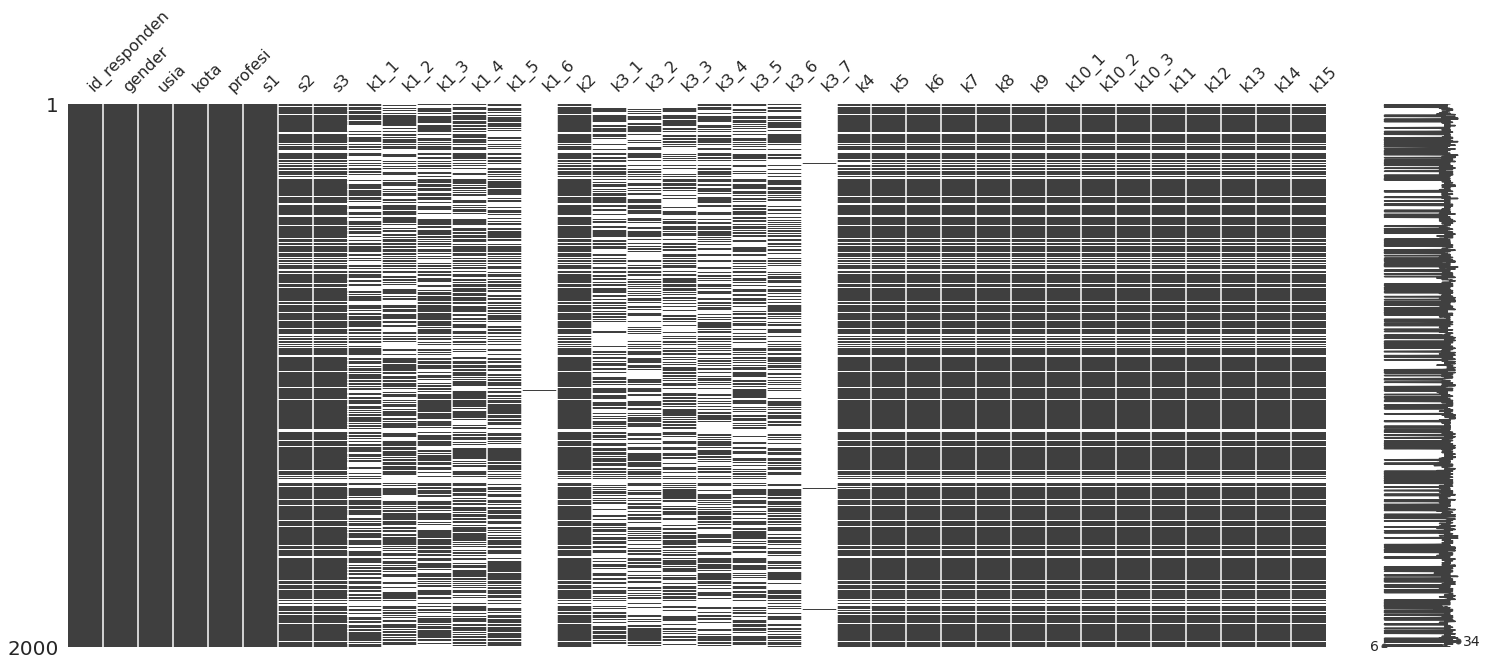

In [7]:
# Visualisasi missing values sebagai matrix
msno.matrix(df)

<Axes: >

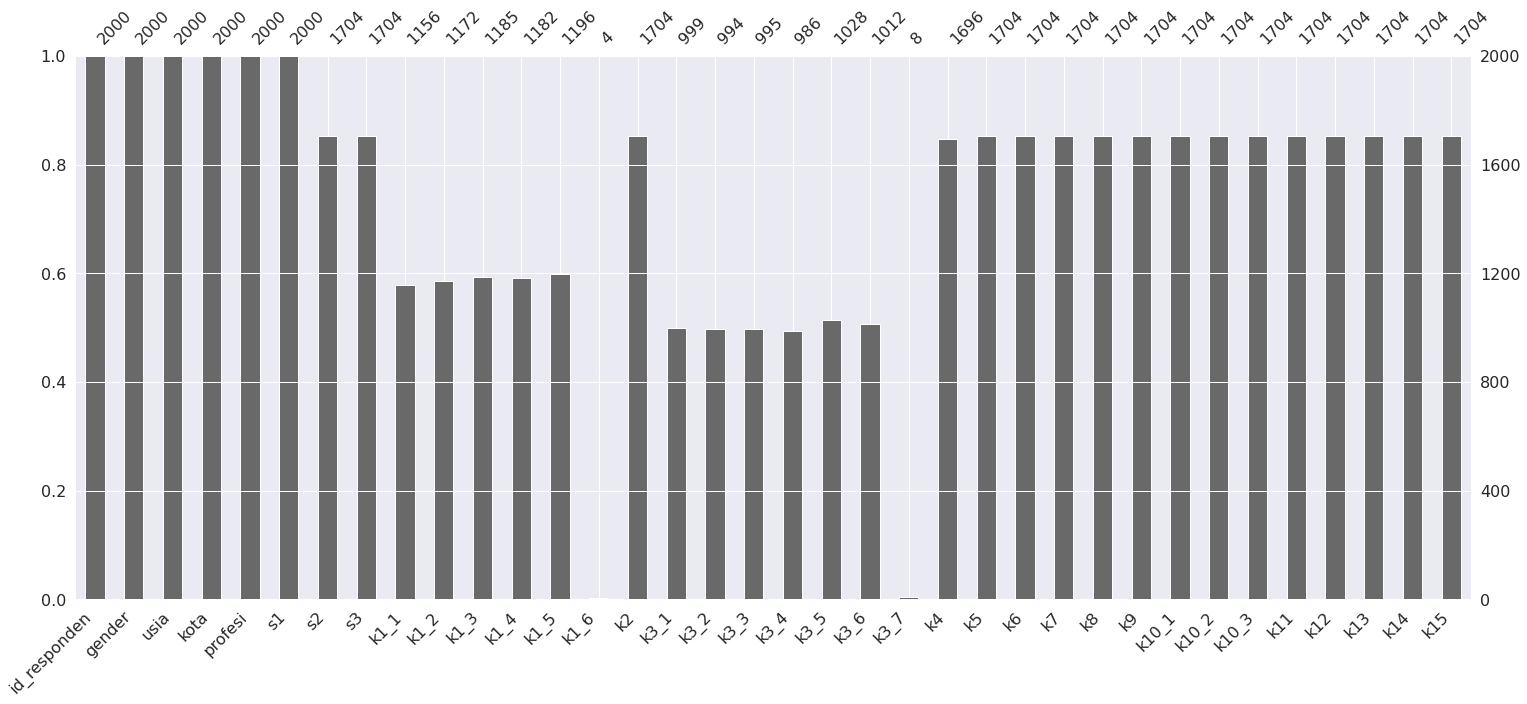

In [45]:
#visualisasi missing value dalam bentuk bar
msno.bar(df)

Observasi:

1. Berdasarkan grafik diatas, tidak terdapat missing value pada id_responden, gender, usia, kota, profesi, s1
2. Missing value terbanyak ada di kolom k3_1 s/d k3_4
3. Pada kolom k4 hingga k15 memiliki jumlah missing value yang sama

In [46]:
df_new = df.copy()

In [47]:
#drop variabel k1_6 dan k3_7 karena memiliki missing value sangat tinggi
df0=df_new.drop(['k1_6','k3_7','k3_1','k3_2','k3_3','k3_4'], axis=1)

In [48]:
#imputasi missing value menggunakan modus
df0['s2'] = df0['s2'].fillna(df0['s2'].mode()[0])
df0['s3'] = df0['s3'].fillna(df0['s3'].mode()[0])
df0['k4'] = df0['k4'].fillna(df0['k4'].mode()[0])
df0['k5'] = df0['k5'].fillna(df0['k5'].mode()[0])
df0['k10_1'] = df0['k10_1'].fillna(df0['k10_1'].mode()[0])
df0['k10_2'] = df0['k10_2'].fillna(df0['k10_2'].mode()[0])
df0['k10_3'] = df0['k10_3'].fillna(df0['k10_3'].mode()[0])
df0['k13'] = df0['k13'].fillna(df0['k13'].mode()[0])
df0['k14'] = df0['k14'].fillna(df0['k14'].mode()[0])
df0['k6'] = df0['k6'].fillna(df0['k6'].mode()[0])
df0['k7'] = df0['k7'].fillna(df0['k7'].mode()[0])
df0['k8'] = df0['k8'].fillna(df0['k8'].mode()[0])
df0['k9'] = df0['k9'].fillna(df0['k9'].mode()[0])

In [49]:
#untuk kolom k1_1 s/d k1_5, k3_5, dan k3_6 dilakukan penambahan kategori baru yaitu unknown
def impute_nan_create_category(df0,ColName):
    df0[ColName]=np.where(df0[ColName].isnull(),"Unknown",df0[ColName])
for Columns in ['k1_1','k1_2','k1_3','k1_4','k1_5','k3_5','k3_6']:
    impute_nan_create_category(df0,Columns)

In [50]:
#imputasi missing value menggunakan median
df0['k2'] = df0['k2'].fillna(df0['k2'].median())
df0['k11'] = df0['k11'].fillna(df0['k11'].median())
df0['k12'] = df0['k12'].fillna(df0['k12'].median())
df0['k15'] = df0['k15'].fillna(df0['k15'].median())

In [51]:
#memeriksa jumlah missing value
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id_responden  2000 non-null   object  
 1   gender        2000 non-null   category
 2   usia          2000 non-null   float64 
 3   kota          2000 non-null   category
 4   profesi       2000 non-null   category
 5   s1            2000 non-null   category
 6   s2            2000 non-null   category
 7   s3            2000 non-null   category
 8   k1_1          2000 non-null   object  
 9   k1_2          2000 non-null   object  
 10  k1_3          2000 non-null   object  
 11  k1_4          2000 non-null   object  
 12  k1_5          2000 non-null   object  
 13  k2            2000 non-null   float64 
 14  k3_5          2000 non-null   object  
 15  k3_6          2000 non-null   object  
 16  k4            2000 non-null   category
 17  k5            2000 non-null   category
 18  k6      

Observasi:
Seluruh variabel sudah tidak memiliki missing value dan bisa diterapkan analisis lebih lanjut

## Memeriksa duplicated data

In [52]:
#memeriksa jumlah duplikasi data
df0.duplicated().sum()

0

Observasi: tidak terdapat data double atau duplikasi data

# Data Understanding

## Statistical Summary

In [53]:
#membagi variabel menjadi data numerik dan kategorik
nums = ['usia','k2','k11','k12','k15']
cats = ['gender','kota', 'profesi', 's1', 's2', 's3', 'k1_1', 'k1_2',
       'k1_3', 'k1_4', 'k1_5','k3_5', 'k3_6', 'k4', 'k5','k6', 'k7','k8', 'k9','k10_1', 'k10_2', 'k10_3','k13', 'k14']


In [54]:
#deskripsi data numerik
df0[nums].describe()

,usia,k2,k11,k12,k15
count,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,32.458500,5.704500e+06,5.172500e+06,6.442500,2050.177500
std,4.614534,1.347345e+06,2.535539e+06,3.140004,14.535702
min,25.000000,3.500000e+06,0.000000e+00,1.000000,2025.000000
25%,28.000000,4.500000e+06,3.000000e+06,4.000000,2040.000000
50%,32.000000,5.500000e+06,5.000000e+06,6.000000,2050.000000
75%,36.000000,7.000000e+06,7.000000e+06,9.000000,2060.000000
max,40.000000,8.000000e+06,1.000000e+07,12.000000,2075.000000


Observasi:

1. Nilai minimum dan maximum untuk seluruh kolom terlihat
reasonable
2. k15 memiliki distribusi simetris (mean ~ median)
3. usia, k2, k11, dab k12 memiliki distribusi yang miring ke kanan (positively skewed) karena nilai mean > median

In [55]:
#deskripsi variabel kategori
df0[cats].describe().T

,count,unique,top,freq
gender,2000,2,Laki-laki,1002
kota,2000,19,Tangerang,138
profesi,2000,5,TNI,434
s1,2000,2,Ya,1704
s2,2000,2,Tidak,1174
s3,2000,2,Tidak,1193
k1_1,2000,2,Data Analyst,1156
k1_2,2000,2,Data Scientist,1172
k1_3,2000,2,Data Engineer,1185
k1_4,2000,2,Machine Learning Engineer,1182


In [56]:
# menampilkan data secara detail
for col in cats:
  print(f"Value counts of {col} column")
  print(df0[col].value_counts(), '\n')

Value counts of gender column
Laki-laki    1002
Perempuan     998
Name: gender, dtype: int64 

Value counts of kota column
Tangerang      138
Samarinda      117
Surabaya       114
Yogyakarta     112
Bogor          112
Makassar       111
Cilacap        109
Jakarta        107
Bekasi         104
Medan          104
Lampung        101
Palu           101
Bandung         99
Tasikmalaya     98
Banda Aceh      98
Pontianak       97
Depok           94
Malang          93
Semarang        91
Name: kota, dtype: int64 

Value counts of profesi column
TNI               434
Polisi            396
Guru/ Dosen       394
Pegawai swasta    393
PNS               383
Name: profesi, dtype: int64 

Value counts of s1 column
Ya       1704
Tidak     296
Name: s1, dtype: int64 

Value counts of s2 column
Tidak    1174
Ya        826
Name: s2, dtype: int64 

Value counts of s3 column
Tidak    1193
Ya        807
Name: s3, dtype: int64 

Value counts of k1_1 column
Data Analyst    1156
Unknown          844
Name: k1_1,

**Observasi:**
1. Rata-rata feature cetagorical memiliki nilai unique value 2
2. Jumlah responden `gender` relatif seimbang antara wanita dan pria
3. Mayoritas responden bekerja sebagai TNI dan berdomisili di Tangerang
4. Kebanyakan responden tidak mengetahui fungsi (`s2`) dan manfaat big data (`s3`)
5. Mayoritas responden merespon jika big data tidak penting

#Analisis Univariat

In [102]:
#one hot encoding untuk data kategorik
cols = ['gender','kota','profesi','s1','s2','s3','k1_1','k1_2','k1_3','k1_4','k1_5','k3_5','k3_6','k4','k5','k10_1','k10_2','k10_3','k13','k14']
df0[cols] = df0[cols].apply(lambda x: pd.factorize(x)[0] + 1)
df0[cols].head()

,gender,kota,profesi,s1,s2,s3,k1_1,k1_2,k1_3,k1_4,k1_5,k3_5,k3_6,k4,k5,k10_1,k10_2,k10_3,k13,k14
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,1,2,2,2,2,1,2,2,1,2,1,2,1,1,2,2
2,1,3,1,1,2,1,1,2,1,1,1,2,2,3,2,2,2,2,3,1
3,1,4,1,1,1,2,2,1,2,2,1,2,1,4,3,1,1,2,3,1
4,2,5,3,1,2,2,1,2,1,1,1,1,1,2,4,2,3,1,2,1


In [103]:
#rank encoding untuk data ordinal
df0['k6'] = df0['k6'].replace(['Biasa saja', 'Penting', 'Sangat penting', 'Sangat tidak penting',
                         'Tidak penging'],[3,4,5,1,2])
df0['k7'] = df0['k7'].replace(['Biasa saja', 'Penting', 'Sangat penting', 'Sangat tidak penting',
                         'Tidak penging'],[3,4,5,1,2])
df0['k8'] = df0['k8'].replace(['Biasa saja', 'Penting', 'Sangat penting', 'Sangat tidak penting',
                         'Tidak penging'],[3,4,5,1,2])
df0['k9'] = df0['k9'].replace(['Biasa saja', 'Penting', 'Sangat penting', 'Sangat tidak penting',
                         'Tidak penging'],[3,4,5,1,2])

In [104]:
#mengganti tipe data k6,k7,k8,dan k9
df0['k6'] = pd.to_numeric(df0['k6'], errors='coerce')
df0['k7'] = pd.to_numeric(df0['k7'], errors='coerce')
df0['k8'] = pd.to_numeric(df0['k8'], errors='coerce')
df0['k9'] = pd.to_numeric(df0['k9'], errors='coerce')

## Deteksi Outlier Dengan Boxplot

In [60]:
#membagi kolom menjadi beberapa bagian untuk memudahkan tampilan grafik
nums = ['usia','k2','k11','k12','k15' ]
outl1= ['gender','kota','profesi','s1','s2','s3']
outl2=['k1_1','k1_2','k1_3','k1_4','k1_5']
outl3= ['k2','k3_5','k3_6','k4','k5']
outl4 = ['k6','k7','k8','k9','k10_1']
outl5 = ['k10_2','k10_3','k13','k14']

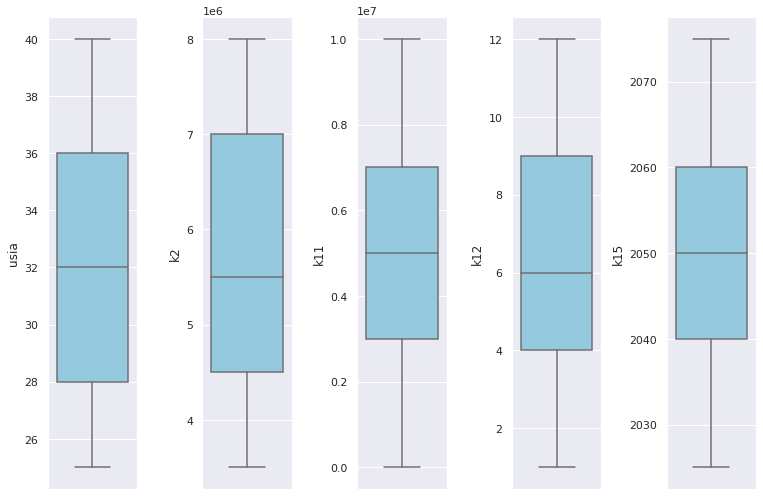

In [61]:
#memeriksa outlier pada data numerik menggunakan boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df0[nums[i]],color='skyblue',orient='v')
    plt.tight_layout()
    

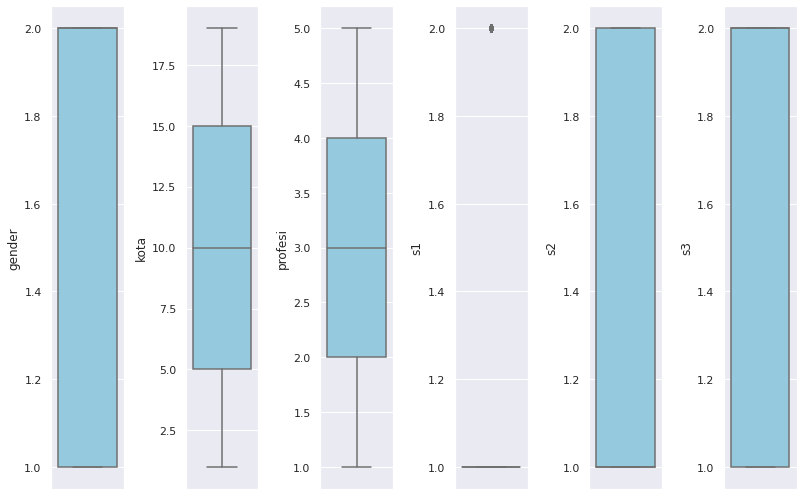

In [ ]:
#memeriksa outlier pada data numerik menggunakan boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(outl1)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df0[outl1[i]],color='skyblue',orient='v')
    plt.tight_layout()

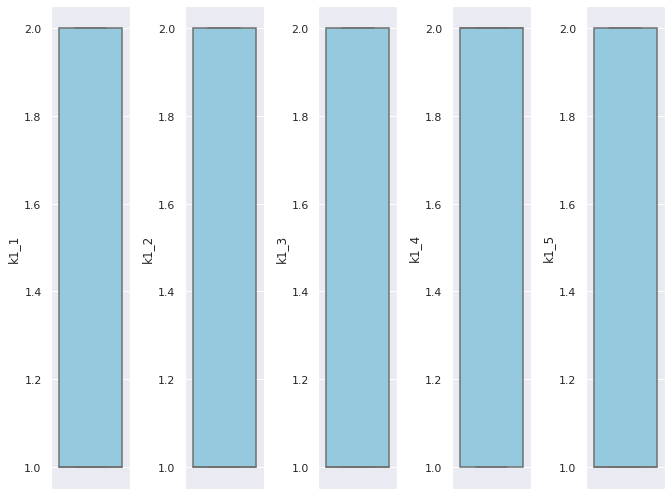

In [ ]:
#memeriksa outlier pada data numerik menggunakan boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(outl2)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df0[outl2[i]],color='skyblue',orient='v')
    plt.tight_layout()

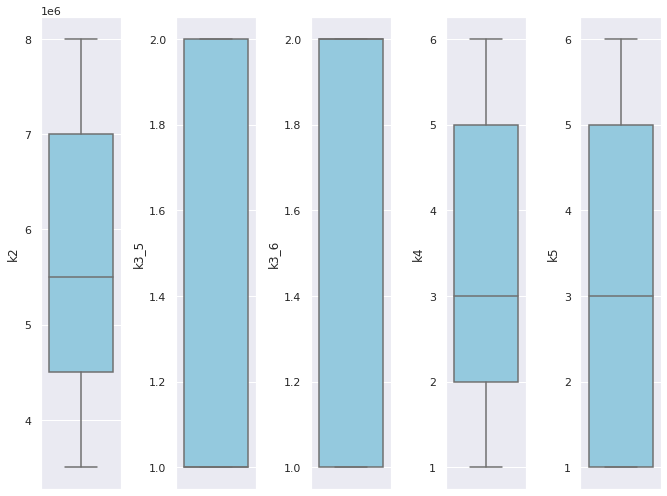

In [ ]:
#memeriksa outlier pada data numerik menggunakan boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(outl3)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df0[outl3[i]],color='skyblue',orient='v')
    plt.tight_layout()

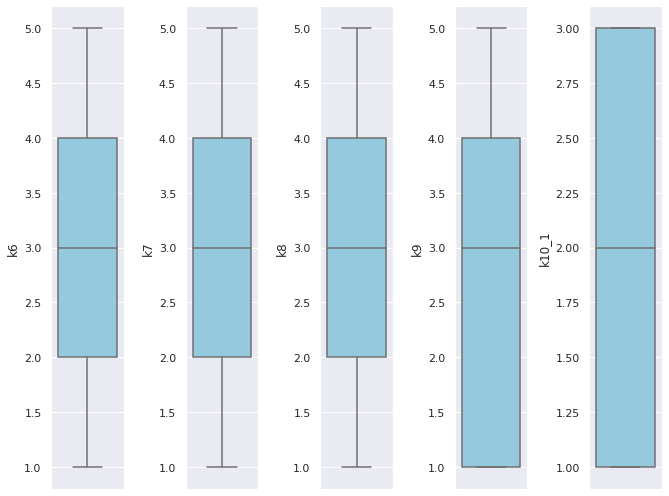

In [ ]:
#memeriksa outlier pada data numerik menggunakan boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(outl4)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df0[outl4[i]],color='skyblue',orient='v')
    plt.tight_layout()

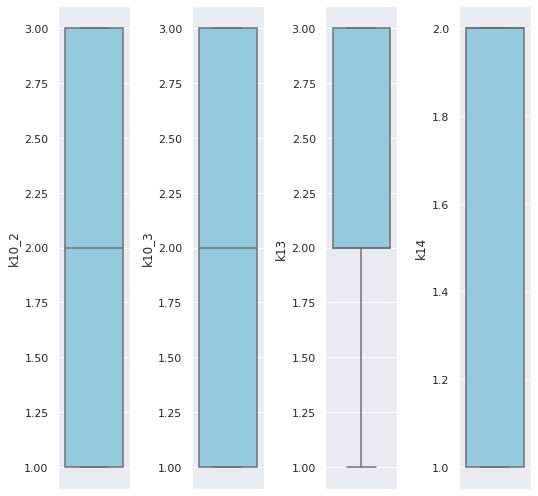

In [ ]:
#memeriksa outlier pada data numerik menggunakan boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(outl5)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df0[outl5[i]],color='skyblue',orient='v')
    plt.tight_layout()

Observasi:
1. Pada data yang berbentuk numerik, diketahui tidak ada outlier
2. Untuk kolom lain outlier masih aman

## Cek Distribusi Data Dengan KDE

In [62]:
#membagi kolom menjadi beberapa bagian
nums = ['usia','k2','k11','k12','k15','k6','k7','k8','k9' ]

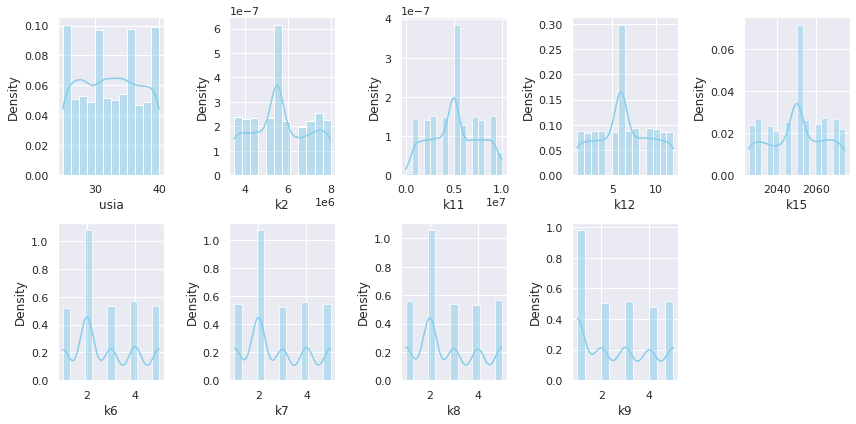

In [63]:
# distribusi kolom
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.histplot(x=df0[features[i]], kde=True, stat="density",color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observasi:
1. Data terdiri dari angka dengan beberapa unique value, sehingga distribusi terlihat tidak merata
2. Ada satu nilai yang terlihat sangat tinggi akibat dari imputasi saat menangani missing value


# Analisis Bivariat

In [64]:
df1=df0.copy()

In [65]:
#replace data beberapa predictor

df1['gender'] = df1['gender'].replace([1,2],['Perempuan','Laki-laki'])
df1['kota'] = df1['kota'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],['Malang','Pontianak','Surabaya','Bekasi','Samarinda','Banda Aceh','Yogyakarta','Tasikmalaya','Medan','Bandung','Semarang','Palu','Makassar','Bogor','Tangerang','Jakarta','Cilacap','Lampung','Depok'])
df1['profesi'] = df1['profesi'].replace([1,2,3,4,5],['TNI','PNS','Polisi','Guru/Dosen','Pegawai Swasta'])
df1['s1'] = df1['s1'].replace([1,2],['Ya','Tidak'])
df1['s2'] = df1['s2'].replace([1,2],['Tidak','Ya'])
df1['s3'] = df1['s3'].replace([1,2],['Ya','Tidak'])
df1['k1_1'] =df1['k1_1'].replace([1,2],['Data Analyst','Unknown'])
df1['k1_2'] = df1['k1_2'].replace([1,2],['Data Scientist','Unknown'])
df1['k1_3'] = df1['k1_3'].replace([1,2],['Data Engineer','Unknown'])
df1['k1_4'] = df1['k1_4'].replace([1,2],['Machine Learning Engineer','Unknown'])
df1['k1_5'] = df1['k1_5'].replace([1,2],['Business Analyst ','Unknown'])
df1['k3_5'] = df1['k3_5'].replace([1,2],['Sastra Bahasa','Unknown'])
df1['k3_6'] = df1['k3_6'].replace([1,2],['Statistika','Unknown'])
df1['k4'] = df1['k4'].replace([1,2,3,4,5,6],['Ilmu komputer','Bisnis dan Manajemen','Fisika','Matematika','Sastra Bahasa','Statistika'])
df1['k5'] = df1['k5'].replace([1,2,3,4,5,6],['Rasa penasaran yang tinggi','Pemrograman (Python; R; Scala; Java; SQL)','Software statistik (SPSS; Matlab;SAS)','Business Intelligence (Power BI, Tableau)','Berbicara di depan umum','Ilmu analisis data (Statistik, Machine Learning)'])
df1['k6'] = df1['k6'].replace([2,4,3,5,1],['Tidak penting','Penting','Biasa saja','Sangat penting','Sangat tidak penting'])
df1['k7'] = df1['k7'].replace([2,4,3,5,1],['Tidak penting','Penting','Biasa saja','Sangat penting','Sangat tidak penting'])
df1['k8'] = df1['k8'].replace([2,4,3,5,1],['Tidak penting','Penting','Biasa saja','Sangat penting','Sangat tidak penting'])
df1['k9'] = df1['k9'].replace([2,4,3,5,1],['Tidak penting','Penting','Biasa saja','Sangat penting','Sangat tidak penting'])
df1['k10_1'] = df1['k10_1'].replace([2,1,3],['Pemerintah','Lembaga Pendidikan','Industri/Swasta'])
df1['k10_2'] = df1['k10_2'].replace([2,3,1],['Pemerintah','Lembaga Pendidikan','Industri/Swasta'])
df1['k10_3'] = df1['k10_3'].replace([3,2,1],['Pemerintah','Lembaga Pendidikan','Industri/Swasta'])
df1['k13'] = df1['k13'].replace([2,3,1],['Belum ada tindak lanjut','Dalam proses merespon perkembangan Data science','Sudah baik dalam penerapan Data science'])
df1['k14'] = df1['k14'].replace([1,2],['Ya','Tidak'])

<Axes: xlabel='profesi', ylabel='count'>

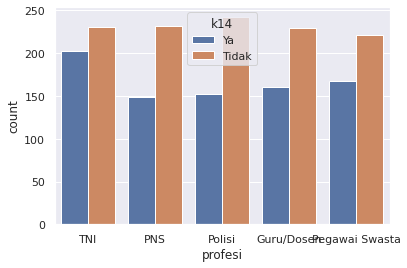

In [ ]:

sns.countplot(data=df1,
            hue='k14',
            x='profesi')

Observasi:
Seluruh responden dari beragam profesi mengaku tidak tertarik dengan big data

<Axes: xlabel='k10_3', ylabel='count'>

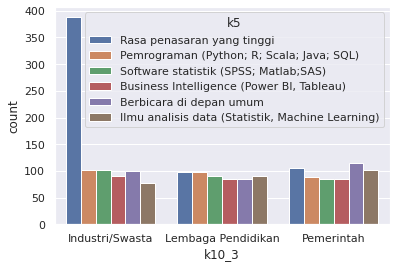

In [ ]:

sns.countplot(data=df1,
            hue='k5',
            x='k10_3')

Observasi:
Para responden berpendapat jika rasa penasaran yang tinggi menjadi skill yang harus dimiliki jika bekerja di industri/swasta

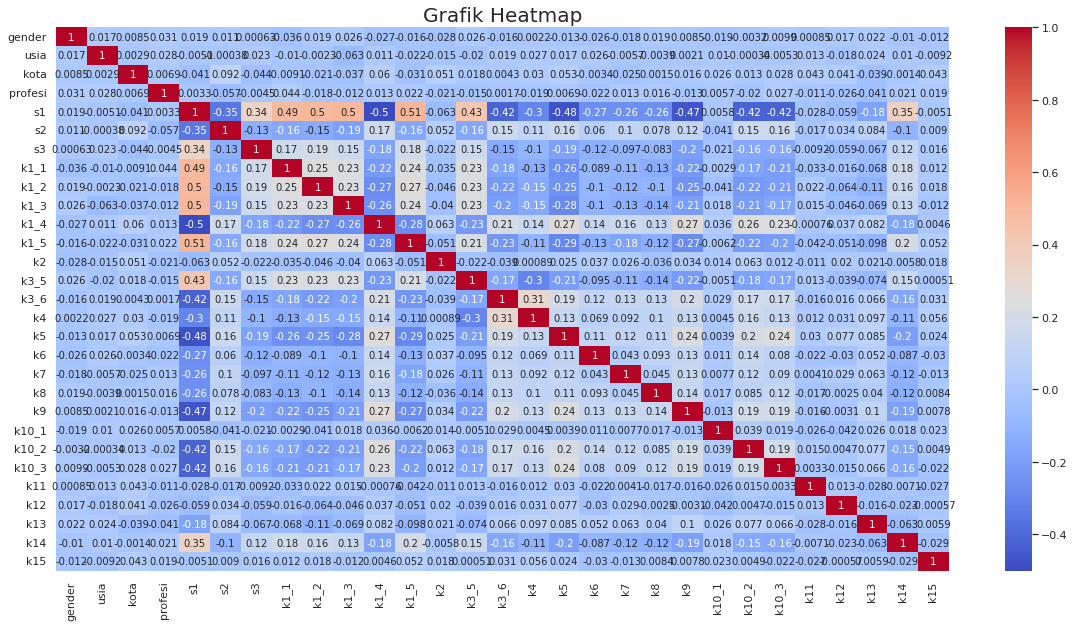

In [67]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df0.corr(),cmap = 'coolwarm', annot = True,fmt=".2g")
plt.title('Grafik Heatmap', fontsize = 20)
plt.show()
     


Observasi;
1. Terlihat banyak variabel yang saling berkorelasi. Sulit untuk membangun model jika melihat variabel satu per satu. 
2. Data analyst, data engineer, dan data scientist mengetahui apa itu big data
3. Responden yang mengerti apa itu big data memiliki ketertarikan terhadap big data
3. Responden yang mengatahui apa itu big data juga mengetahui manfaat big data



# PCA

In [192]:
df3=df0.copy()

In [189]:
df_final=df0.copy

In [194]:
#memeriksa kolom apa saja dalam tabel df2
df3.columns

Index(['id_responden', 'gender', 'usia', 'kota', 'profesi', 's1', 's2', 's3',
       'k1_1', 'k1_2', 'k1_3', 'k1_4', 'k1_5', 'k2', 'k3_5', 'k3_6', 'k4',
       'k5', 'k6', 'k7', 'k8', 'k9', 'k10_1', 'k10_2', 'k10_3', 'k11', 'k12',
       'k13', 'k14', 'k15'],
      dtype='object')

In [197]:
#drop id responden
df3=df0.drop(['id_responden'], axis=1)

In [199]:
#menyusun data numerik
numerical_features = ['usia','k2','k11','k12','k15','k6','k7','k8','k9']

In [200]:
from sklearn.preprocessing import StandardScaler
dataset_scaled = df3.copy()
ss = StandardScaler()

for col in numerical_features:
    dataset_scaled[col] = ss.fit_transform(dataset_scaled[[col]])
display(dataset_scaled.shape, dataset_scaled.head(3))

(2000, 29)

,gender,usia,kota,profesi,s1,s2,s3,k1_1,k1_2,k1_3,k1_4,k1_5,k2,k3_5,k3_6,k4,k5,k6,k7,k8,k9,k10_1,k10_2,k10_3,k11,k12,k13,k14,k15
0,1,-1.183189,1,1,1,1,1,1,1,1,1,1,-0.523011,1,1,1,1,-0.636620,0.858938,-0.617333,0.883614,1,1,1,1.509918,-1.733712,1,1,-1.732548
1,2,-0.316146,2,2,2,1,2,2,2,2,1,2,-0.151818,2,1,2,1,-0.636620,-0.623268,-0.617333,-1.127647,2,1,1,-0.068050,-0.140959,2,2,-0.012214
2,1,-1.616710,3,1,1,2,1,1,2,1,1,1,-0.894204,2,2,3,2,0.110587,0.858938,-1.353128,-1.127647,2,2,2,0.720934,-1.733712,3,1,-0.700348


In [202]:
df_ml=df0.drop(['id_responden','kota','profesi','gender'], axis=1)

In [203]:
#PCA atau Principal Component Analysis merupakan konsep reduksi dimensi yang dilakukan demi memudahkan proses machine learning untuk menentukan algoritma.
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_ml)

PCA()

PCA atau Principal Component Analysis merupakan konsep reduksi dimensi yang dilakukan demi memudahkan proses machine learning untuk menentukan algoritma.

In [204]:
pca.explained_variance_ratio_

array([7.79846419e-01, 2.20153581e-01, 2.56039687e-11, 2.58312161e-12,
       1.20036971e-12, 5.52250131e-13, 3.07472980e-13, 2.46212302e-13,
       2.15337341e-13, 2.00046661e-13, 1.99188413e-13, 8.95725788e-14,
       6.95445300e-14, 6.72523685e-14, 4.40225673e-14, 3.95694769e-14,
       2.67697812e-14, 2.55801465e-14, 2.52994935e-14, 2.49192623e-14,
       2.27407100e-14, 2.18499017e-14, 2.14617826e-14, 2.08650759e-14,
       2.04102272e-14, 2.98352032e-15])

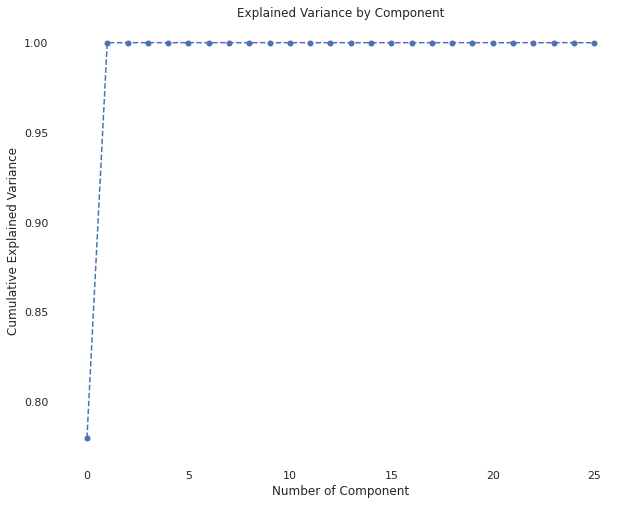

In [205]:
#menampilkan grafik explained variance
plt.figure(figsize=(10,8))
plt.rcParams.update({"axes.facecolor":'1'})
plt.plot(range(0,26),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Dari hasil variasi kumulatif rasio dapat diketahui bahwa mereduksi dataset kita menjadi 2 dimensi menggunakan metode pca sudah dapat mewakili 100% variasi nilai pada dataset.
Dikarenakan treshold kelayakannya ada 80% maka n component pca yang akan dipilih adalah 2 (atau 2 dimensi)

In [206]:
pca = PCA(n_components=2)
pca.fit(df_ml)
df_pca = pca.transform(df_ml)

In [207]:
df_pca = pd.DataFrame(data = df_pca, columns = ['PC 1','PC 2'])
df_pca.describe()

,PC 1,PC 2
count,2.000000e+03,2.000000e+03
mean,-5.401671e-11,7.450581e-12
std,2.535603e+06,1.347224e+06
min,-4.845865e+06,-2.239505e+06
25%,-1.837563e+06,-1.174378e+06
50%,1.707745e+05,-2.059432e+05
75%,2.162296e+06,1.268780e+06
max,5.191618e+06,2.336009e+06


In [148]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

In [208]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_error.append(km.inertia_)

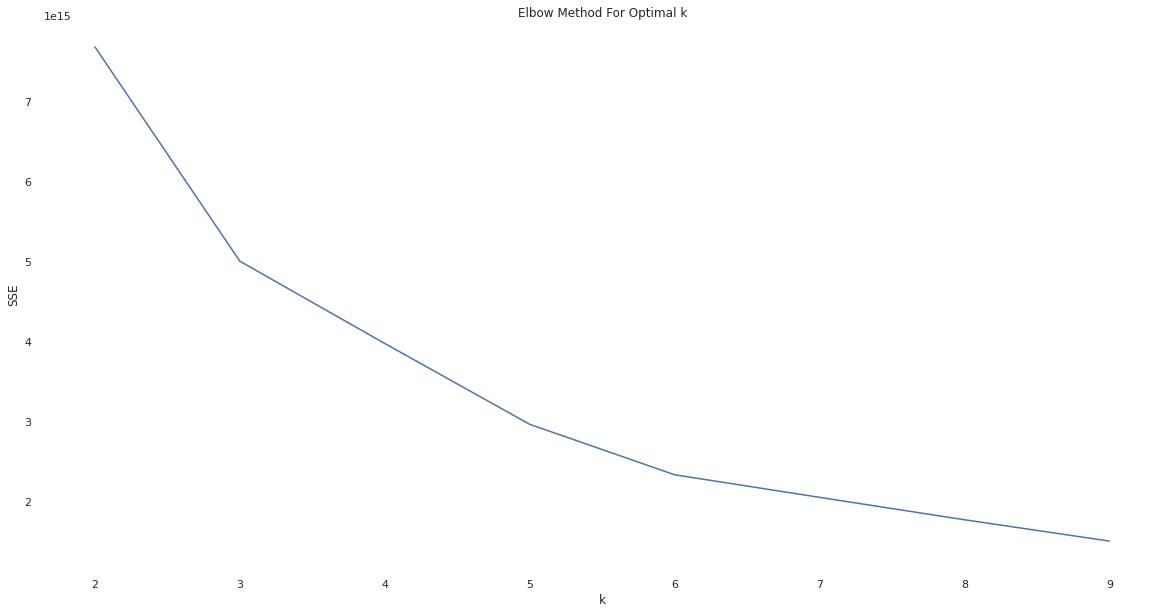

In [209]:
#menampilkan elbow method
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()
     

Observasi:
Dari hasil di atas, nilai n cluster yang terbaik untuk dataset pca yaitu sebanyak 3 cluster.
Hal ini menyatakan bahwa nantinya customer akan dibagi menjadi 3 kelompok cluster

In [210]:
#menghitung silhouetter scor
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_pca)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_pca, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))#

For n_clusters = 2, silhouette score is 0.4538129791261373
For n_clusters = 3, silhouette score is 0.4284739666996896
For n_clusters = 4, silhouette score is 0.42879687535655275
For n_clusters = 5, silhouette score is 0.44965622114002335
For n_clusters = 6, silhouette score is 0.45193266595877607
For n_clusters = 7, silhouette score is 0.4499710091420876
For n_clusters = 8, silhouette score is 0.45639483547069526
For n_clusters = 9, silhouette score is 0.4635452118415195


Observasi:
Dari output di atas, penggunaan n cluster 3 untuk dataset pca yang digunakan diprediksi sudah dapat memperoleh nilai silhouette score 0.42. Namun silhouette tertinggi ada di cluster 9

# Kmeans

In [157]:
# Memodelkan data dengan k-means
kmean= KMeans(3)
kmean.fit(df2)
labels=kmean.labels_

In [211]:
kmeans = KMeans(n_clusters=3,random_state=42).fit(df_pca)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [255]:
df_pca = pd.DataFrame(data=df_pca)
df_pca['k_label'] = kmeans.labels_
df_ml['k_label'] = kmeans.labels_
df3['k_label'] = kmeans.labels_


df_pca.head()

,PC 1,PC 2,k_label
0,-3.833288e+06,-6.722933e+05,1
1,1.707745e+05,-2.059432e+05,2
2,-1.837563e+06,-1.189092e+06,1
3,-3.837492e+06,-1.172276e+06,1
4,1.749785e+05,2.940392e+05,2


In [256]:
df_ml.head()

,usia,s1,s2,s3,k1_1,k1_2,k1_3,k1_4,k1_5,k2,k3_5,k3_6,k4,k5,k6,k7,k8,k9,k10_1,k10_2,k10_3,k11,k12,k13,k14,k15,k_label
0,27.0,1,1,1,1,1,1,1,1,5000000.0,1,1,1,1,2,4,2,4,1,1,1,9000000.0,1.0,1,1,2025.0,1
1,31.0,2,1,2,2,2,2,1,2,5500000.0,2,1,2,1,2,2,2,1,2,1,1,5000000.0,6.0,2,2,2050.0,2
2,25.0,1,2,1,1,2,1,1,1,4500000.0,2,2,3,2,3,4,1,1,2,2,2,7000000.0,1.0,3,1,2040.0,1
3,26.0,1,1,2,2,1,2,2,1,4500000.0,2,1,4,3,1,5,3,4,1,1,2,9000000.0,7.0,3,1,2035.0,1
4,28.0,1,2,2,1,2,1,1,1,6000000.0,1,1,2,4,1,4,3,3,2,3,1,5000000.0,6.0,2,1,2025.0,2


In [257]:
df3.head()

,gender,usia,kota,profesi,s1,s2,s3,k1_1,k1_2,k1_3,k1_4,k1_5,k2,k3_5,k3_6,k4,k5,k6,k7,k8,k9,k10_1,k10_2,k10_3,k11,k12,k13,k14,k15,k_label
0,1,27.0,1,1,1,1,1,1,1,1,1,1,5000000.0,1,1,1,1,2,4,2,4,1,1,1,9000000.0,1.0,1,1,2025.0,1
1,2,31.0,2,2,2,1,2,2,2,2,1,2,5500000.0,2,1,2,1,2,2,2,1,2,1,1,5000000.0,6.0,2,2,2050.0,2
2,1,25.0,3,1,1,2,1,1,2,1,1,1,4500000.0,2,2,3,2,3,4,1,1,2,2,2,7000000.0,1.0,3,1,2040.0,1
3,1,26.0,4,1,1,1,2,2,1,2,2,1,4500000.0,2,1,4,3,1,5,3,4,1,1,2,9000000.0,7.0,3,1,2035.0,1
4,2,28.0,5,3,1,2,2,1,2,1,1,1,6000000.0,1,1,2,4,1,4,3,3,2,3,1,5000000.0,6.0,2,1,2025.0,2


In [258]:
#mengkode cluster
map_cluster = {
    0 : 'Kurang Penting',
    1 : 'Biasa Saja',
    2 : 'Penting'}
df3['k_label'] = df3['k_label'].map(map_cluster)

In [259]:
df3.head(5)

,gender,usia,kota,profesi,s1,s2,s3,k1_1,k1_2,k1_3,k1_4,k1_5,k2,k3_5,k3_6,k4,k5,k6,k7,k8,k9,k10_1,k10_2,k10_3,k11,k12,k13,k14,k15,k_label
0,1,27.0,1,1,1,1,1,1,1,1,1,1,5000000.0,1,1,1,1,2,4,2,4,1,1,1,9000000.0,1.0,1,1,2025.0,Biasa Saja
1,2,31.0,2,2,2,1,2,2,2,2,1,2,5500000.0,2,1,2,1,2,2,2,1,2,1,1,5000000.0,6.0,2,2,2050.0,Penting
2,1,25.0,3,1,1,2,1,1,2,1,1,1,4500000.0,2,2,3,2,3,4,1,1,2,2,2,7000000.0,1.0,3,1,2040.0,Biasa Saja
3,1,26.0,4,1,1,1,2,2,1,2,2,1,4500000.0,2,1,4,3,1,5,3,4,1,1,2,9000000.0,7.0,3,1,2035.0,Biasa Saja
4,2,28.0,5,3,1,2,2,1,2,1,1,1,6000000.0,1,1,2,4,1,4,3,3,2,3,1,5000000.0,6.0,2,1,2025.0,Penting


In [260]:
#persentase cluster
df_count = df3.groupby('k_label').agg({'k1_1':'count'}).reset_index()
df_count.columns = ['k_label','Total_Responden']
df_count['Percentage'] = round(df_count['Total_Responden']/df_count['Total_Responden'].sum()*100)
df_count = df_count.sort_values(by =['Total_Responden'], ascending=False)
df_count

,k_label,Total_Responden,Percentage
2,Penting,827,41.0
0,Biasa Saja,624,31.0
1,Kurang Penting,549,27.0


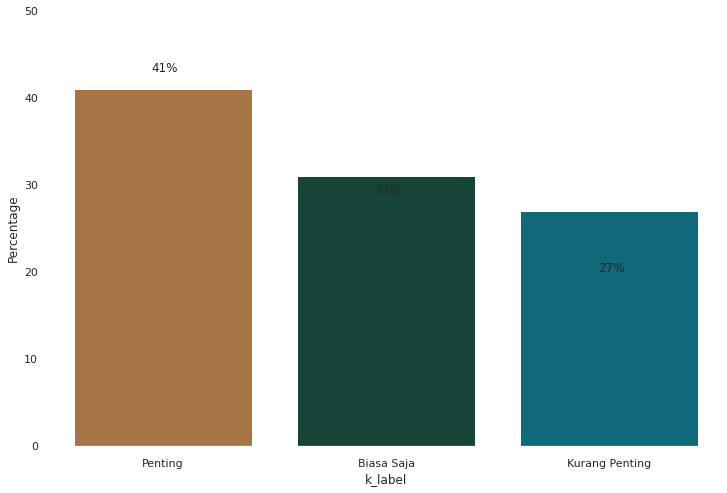

In [275]:
#grafik persentase cluster
ax = sns.set(rc={'figure.figsize':(12,8)})
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(x=df_count['k_label'], y=df_count['Percentage'],palette=['#B87333','#0f4b3b','#007489','#b8293d'])
ax.patch.set_facecolor('white')
plt.text(x=-0.05,y=43, s='41%')
plt.text(x=0.95,y=29, s='31%')
plt.text(x=1.95,y=20, s='27%')
plt.ylim(0,50)
plt.show()

In [274]:
df3.groupby('k_label').mean()

,gender,usia,kota,profesi,s1,s2,s3,k1_1,k1_2,k1_3,k1_4,k1_5,k2,k3_5,k3_6,k4,k5,k6,k7,k8,k9,k10_1,k10_2,k10_3,k11,k12,k13,k14,k15
k_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Biasa Saja,1.501603,32.495192,10.477564,2.950321,1.00000,1.469551,1.528846,1.330128,1.333333,1.317308,1.681090,1.285256,5.710737e+06,1.403846,1.580128,3.432692,3.435897,2.953526,3.006410,2.955128,2.921474,1.958333,1.993590,1.991987,8.241987e+06,6.645833,2.275641,1.520833,2049.759615
Kurang Penting,1.502732,32.276867,9.792350,2.954463,1.00000,1.489982,1.531876,1.357013,1.289617,1.275046,1.703097,1.331512,5.768670e+06,1.377049,1.610200,3.417122,3.309654,3.087432,2.994536,3.038251,3.020036,1.972678,1.974499,2.029144,1.989071e+06,6.593807,2.338798,1.515483,2050.464481
Penting,1.499395,32.551391,9.974607,2.983071,1.35792,1.319226,1.690447,1.534462,1.557437,1.563482,1.448609,1.536880,5.657195e+06,1.620314,1.380895,2.860943,2.663845,2.619105,2.614268,2.619105,2.276904,2.024184,1.654172,1.628779,4.969770e+06,6.188634,2.192261,1.679565,2050.302297


Kesimpulan:
1. Cluster terbagi menjadi 3 yaitu biasa saja, kurang penting, dan penting. Artinya, responden dalam merespon tren big data dapat diklasifikasikan menjadi responden yang biasa saja dengan adanya tren big data, responden yang merasa big data kurang penting, dan responden yang merasa big data adalah penting.
2. Kelas responden yang merasa penting jumlahnya lebih banyak (42%) dari responden yang merasa big data biasa saja (31%) dan kurang penting (27%).


Tambahan:
1. Sangat disayangkan masih banyak responden yang merasa big data kurang penting. Padahal big data di era modern seperti saat ini memiliki manfaat yang luar biasa. Salah satunya berguna dalam membantu pengambilan keputusan, berguna untuk dunia bisnis, hingga sektor publik.
